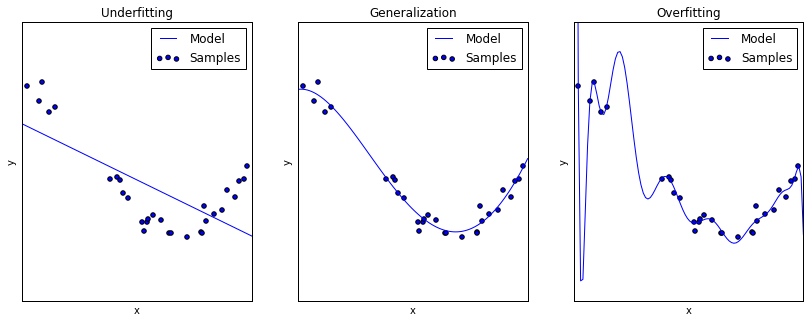

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]
titles = ["Underfitting", "Generalization", "Overfitting"]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    
#     plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(titles[i])
plt.show()

###Regularization
Overfitting usually occurs when the result of training set is getting better, but the model performance on the test set decreases

Penalize large coefficients - to prevent bias/variance tradeoff


In [42]:
%%latex

\begin{eqnarray}
f(x)=x_0 + \theta_1x_1 + \theta_2x_2 + ........... \\
g(x) = \Sigma{ (f(x) - y)^2} + \lambda\Sigma{\theta^2}
\end{eqnarray}

<IPython.core.display.Latex object>

![](http://www.chioka.in/wp-content/uploads/2013/12/L1-vs-L2-properties-loss-function.png)

### Ref
[Underfitting vs. Overfitting](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)